In [1]:
%matplotlib widget
import shapely.geometry
import geopandas
import starepandas
import pickle
import geopandas
import matplotlib.pyplot as plt
import postgis
import sqlalchemy
import numpy
import contextily

# ROI 4326

In [2]:
def make_df(west, east, north, south):
    roi_4326 = shapely.geometry.Polygon([[west, south], [west, north], [east, north], [east, south]])
    roi_4326 = geopandas.GeoDataFrame(geometry=[roi_4326], crs=4326)
    roi_4326 = starepandas.STAREDataFrame(roi_4326)
    roi_sids = roi_4326.make_sids(level=19)
    roi_4326.set_sids(roi_sids, inplace=True)
    roi_4326.set_trixels(roi_4326.make_trixels(), inplace=True)
    return roi_4326

## Small

In [3]:
west = -119.1
east = -119.0
north = 37.7
south = 37.6

roi_4326 = make_df(west, east, north, south)
geopandas.GeoDataFrame(roi_4326['geometry']).to_file('data/roi_4326_small.gpkg', driver='GPKG')

with open('data/roi_4326_small.pickle', 'wb') as f:
    pickle.dump(roi_4326, f)

In [4]:
west = -119.12
east = -118.98
north = 37.72
south = 37.58

roi_buffer = make_df(west, east, north, south)
geopandas.GeoDataFrame(roi_buffer['geometry']).to_file('data/roi_4326_buffer_small.gpkg', driver='GPKG')

with open('data/roi_4326_buffer_small.pickle', 'wb') as f:
    pickle.dump(roi_buffer, f)    

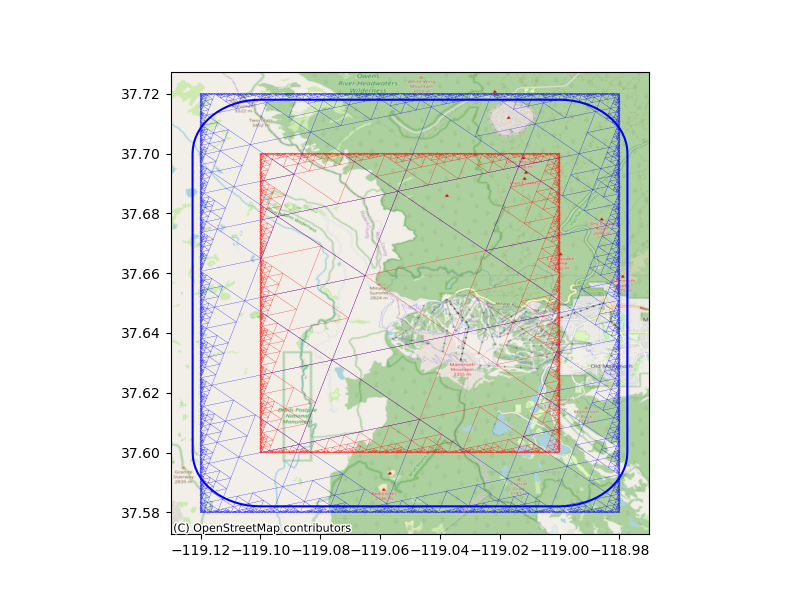

In [5]:
fig = plt.figure(figsize=(8, 6), dpi=100)
ax = fig.add_subplot()

buffer = roi_4326.to_crs(3310).buffer(2000).to_crs(4326)

roi_4326.plot(ax=ax, color='red', linewidth=0.1)
roi_buffer.plot(ax=ax, color='blue', linewidth=0.1)
buffer.exterior.plot(ax=ax, color='blue')

contextily.add_basemap(ax, source=contextily.providers.OpenStreetMap.Mapnik, crs=4326)

## Big

In [6]:
west = -119.12
east = -118.98
north = 37.77
south = 37.59

roi_4326 = make_df(west, east, north, south)
geopandas.GeoDataFrame(roi_4326['geometry']).to_file('data/roi_4326_big.gpkg', driver='GPKG')

with open('data/roi_4326_big.pickle', 'wb') as f:
    pickle.dump(roi_4326, f)  

In [7]:
west = -119.14
east = -118.96
north = 37.79
south = 37.57

roi_buffer = make_df(west, east, north, south)
geopandas.GeoDataFrame(roi_buffer['geometry']).to_file('data/roi_4326_buffer_big.gpkg', driver='GPKG')

with open('data/roi_4326_buffer_big.pickle', 'wb') as f:
    pickle.dump(roi_buffer, f)    

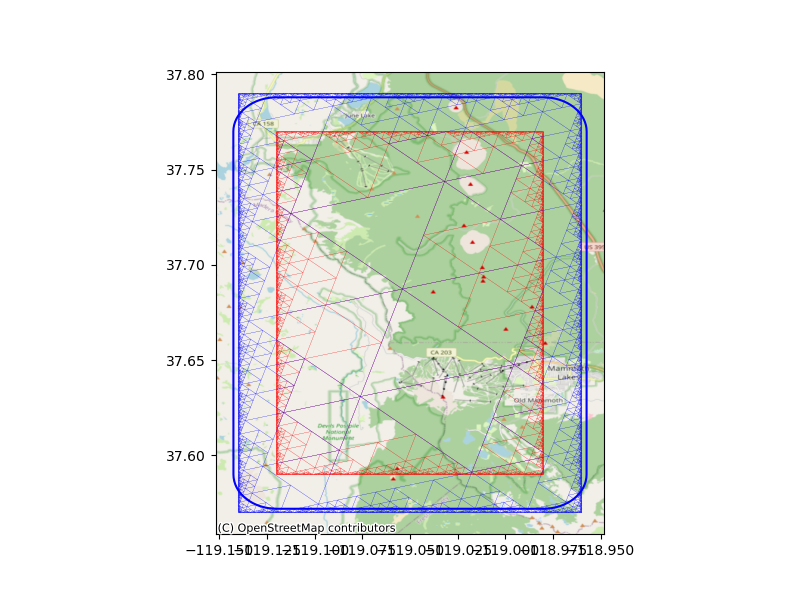

In [8]:
fig = plt.figure(figsize=(8, 6), dpi=100)
ax = fig.add_subplot()

buffer = roi_4326.to_crs(3310).buffer(2000).to_crs(4326)

roi_4326.plot(ax=ax, color='red', linewidth=0.1)
roi_buffer.plot(ax=ax, color='blue', linewidth=0.1)
buffer.exterior.plot(ax=ax, color='blue')

contextily.add_basemap(ax, source=contextily.providers.OpenStreetMap.Mapnik, crs=4326)

## Huge

In [9]:
west = -119.12
east = -118.98
north = 37.78
south = 37.42

roi_4326 = make_df(west, east, north, south)
geopandas.GeoDataFrame(roi_4326['geometry']).to_file('data/roi_4326_huge.gpkg', driver='GPKG')

with open('data/roi_4326_huge.pickle', 'wb') as f:
    pickle.dump(roi_4326, f)  

In [10]:
west = -119.14
east = -118.96
north = 37.80
south = 37.40

roi_buffer = make_df(west, east, north, south)
geopandas.GeoDataFrame(roi_buffer['geometry']).to_file('data/roi_4326_buffer_huge.gpkg', driver='GPKG')

with open('data/roi_4326_buffer_huge.pickle', 'wb') as f:
    pickle.dump(roi_buffer, f)    

In [16]:
print(roi_buffer.geometry.iloc[0])#.to_wkt()

POLYGON ((-119.14 37.4, -119.14 37.8, -118.96 37.8, -118.96 37.4, -119.14 37.4))


# ROI Sinu

In [3]:
r = 6371007.181

def lonlat2xy(lon, lat):
    y = lat * r *(numpy.pi/180)
    x = lon * r * (numpy.cos(numpy.deg2rad(lat))) * (numpy.pi/180)
    return x, y

def xy2lonlat(x, y):
    lat = y / r / (numpy.pi/180)
    lon = x / r / (numpy.cos(numpy.deg2rad(lat))) / (numpy.pi/180)
    return lon, lat

In [4]:
h = 8
v = 5

west = -180 + h * 10
east = west+10
north = 90 - v * 10
south = north-10

_, top = lonlat2xy(0, north)
_, bottom = lonlat2xy(0, south)
left, _ = lonlat2xy(west, 0)
right, _ = lonlat2xy(east, 0)
res = (right-left)/2400

In [5]:
x_min = 1353
x_max = 1402
y_min = 552
y_max = 575

In [18]:
roi_top = top - y_min*res
roi_bottom = top - (y_max+1)*res
roi_left = left + x_min*res
roi_right = left + (x_max+1)*res

In [19]:
north_west = xy2lonlat(roi_left, roi_top)
north_east =  xy2lonlat(roi_right, roi_top)
south_east = xy2lonlat(roi_right, roi_bottom)
south_west = xy2lonlat(roi_left, roi_bottom)
print(north_west)
print(south_east)

(-119.26149320419312, 37.7)
(-118.83806314562221, 37.6)


In [20]:
roi_sinu = shapely.geometry.Polygon([north_west,  south_west, south_east, north_east])

roi_sinu = geopandas.GeoDataFrame(geometry=[roi_sinu], crs=4326)
roi_sinu.to_file('data/roi_sinu.gpkg', driver='GPKG')
roi_sinu = starepandas.STAREDataFrame(roi_sinu)
roi_sinu = roi_sinu.set_sids(roi_sinu.make_sids(level=19))
roi_sinu.add_trixels(inplace=True)

with open('data/roi_sinu.pickle', 'wb') as f:
    pickle.dump(roi_sinu, f)    

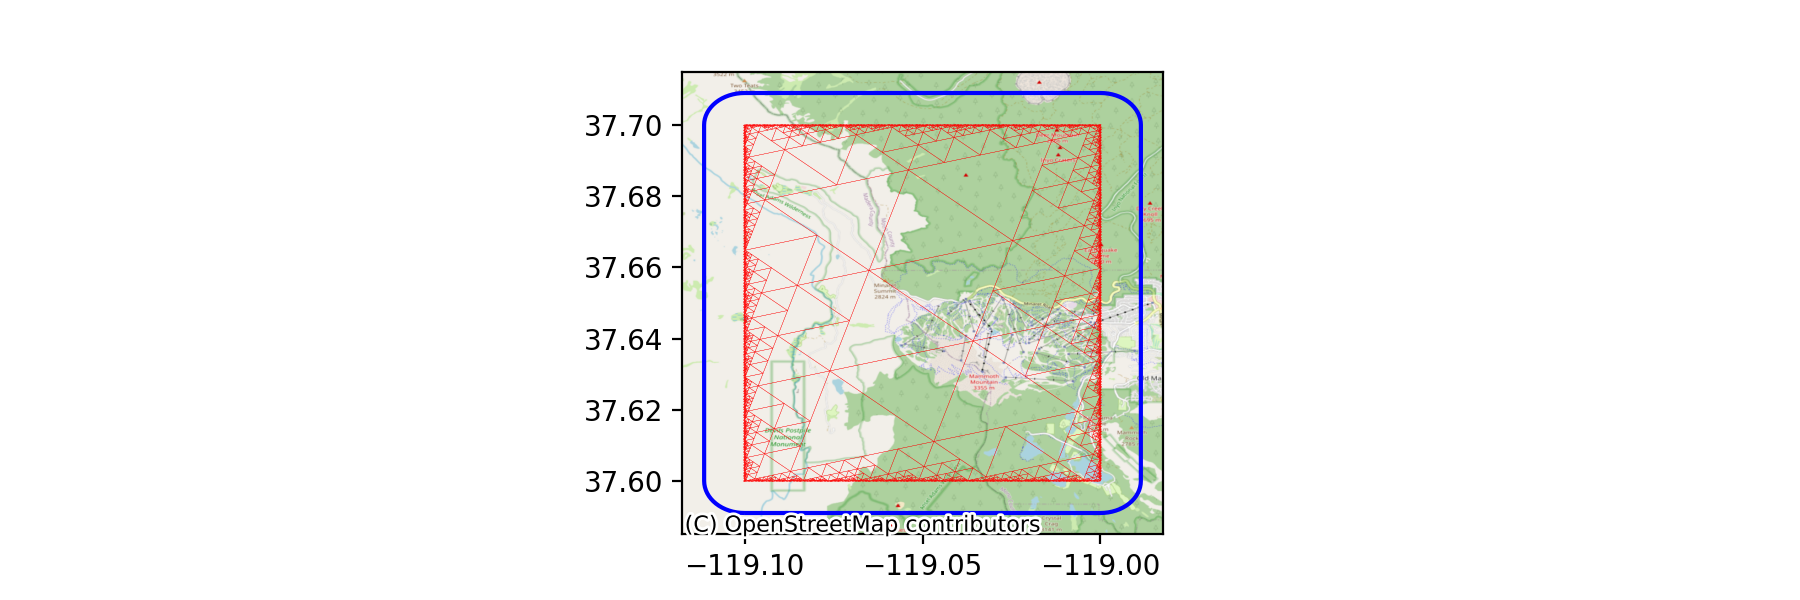

In [37]:
fig = plt.figure(figsize=(9, 3), dpi=200)
ax = fig.add_subplot()

roi_4326.plot(ax=ax, color='red', linewidth=0.1)
roi_sinu.plot(ax=ax, color='green', linewidth=0.1)
buffer.exterior.plot(ax=ax, color='blue')

contextily.add_basemap(ax, source=contextily.providers.OpenStreetMap.Mapnik, crs=4326)

In [ ]:
# ROI B